In [18]:
from utility import *
from sklearn.mixture import BayesianGaussianMixture

import importlib, sys
importlib.reload(sys.modules['utility'])



<module 'utility' from '/home/michele/Documents/Clustering/utility.py'>

PCA dataframes load 

In [2]:
dfs,y=load_PCA_dfs(200)

  0%|          | 0/20 [00:00<?, ?it/s]

Estimator

In [3]:
estimator=BayesianGaussianMixture(covariance_type="diag",max_iter=2000)

Tuning of n_components hyperparameter

In [4]:
results,best_indexes,fitted_estimators=get_results(dfs,y,estimator,True,"n_components",[x for x in range(5,16)])

Total result:   0%|          | 0/20 [00:00<?, ?it/s]

PCA_2:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_12:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_22:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_32:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_42:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_52:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_62:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_72:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_82:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_92:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_102:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_112:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_122:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_132:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_142:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_152:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_162:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_172:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_182:   0%|          | 0/11 [00:00<?, ?it/s]

PCA_192:   0%|          | 0/11 [00:00<?, ?it/s]

In [20]:
save_results("GaussianMixture",results,best_indexes,fitted_estimators)

In [5]:
results

{2:     n_components  rand index
 0              5    0.729067
 1              6    0.734958
 2              7    0.803358
 3              8    0.790329
 4              9    0.828410
 5             10    0.810662
 6             11    0.850745
 7             12    0.858886
 8             13    0.855342
 9             14    0.847306
 10            15    0.851564,
 12:     n_components  rand index
 0              5    0.787497
 1              6    0.809230
 2              7    0.747516
 3              8    0.792902
 4              9    0.841164
 5             10    0.852216
 6             11    0.825363
 7             12    0.842764
 8             13    0.880027
 9             14    0.883366
 10            15    0.886434,
 22:     n_components  rand index
 0              5    0.690774
 1              6    0.612932
 2              7    0.615087
 3              8    0.677035
 4              9    0.674851
 5             10    0.793100
 6             11    0.799023
 7             12    0.7941

In [6]:
results[182].iloc[best_indexes[182]]

n_components    7.000000
rand index      0.259973
Name: 2, dtype: float64

In [7]:
fitted_estimators

{2: BayesianGaussianMixture(covariance_type='diag', max_iter=2000, n_components=12),
 12: BayesianGaussianMixture(covariance_type='diag', max_iter=2000, n_components=15),
 22: BayesianGaussianMixture(covariance_type='diag', max_iter=2000, n_components=15),
 32: BayesianGaussianMixture(covariance_type='diag', max_iter=2000, n_components=15),
 42: BayesianGaussianMixture(covariance_type='diag', max_iter=2000, n_components=13),
 52: BayesianGaussianMixture(covariance_type='diag', max_iter=2000, n_components=15),
 62: BayesianGaussianMixture(covariance_type='diag', max_iter=2000, n_components=12),
 72: BayesianGaussianMixture(covariance_type='diag', max_iter=2000, n_components=11),
 82: BayesianGaussianMixture(covariance_type='diag', max_iter=2000, n_components=6),
 92: BayesianGaussianMixture(covariance_type='diag', max_iter=2000, n_components=5),
 102: BayesianGaussianMixture(covariance_type='diag', max_iter=2000, n_components=6),
 112: BayesianGaussianMixture(covariance_type='diag', max

2D PCA plot

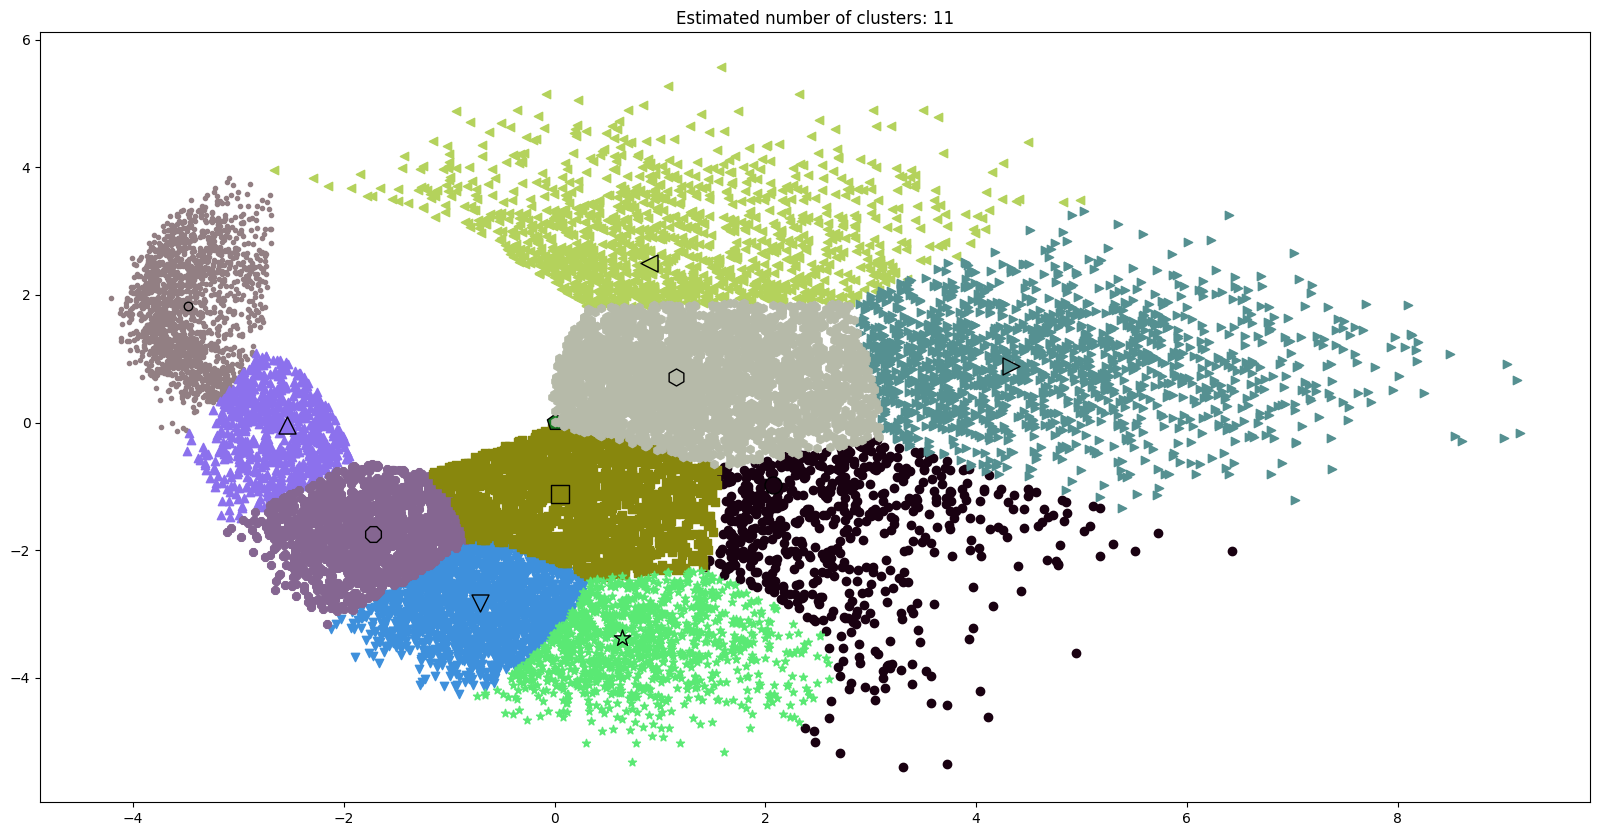

In [11]:
labels = fitted_estimators[2].predict(dfs[2])
means = fitted_estimators[2].means_

plot_clustering(dfs[2],labels=labels,cluster_centers=means)

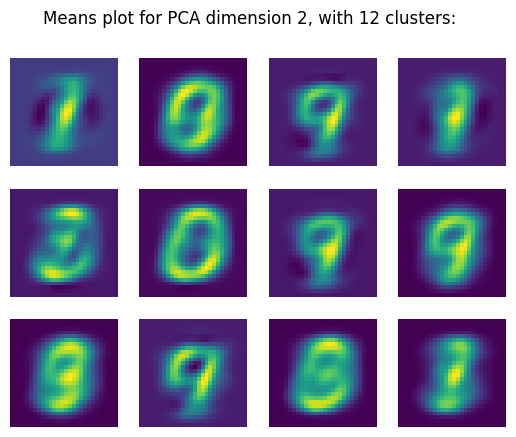

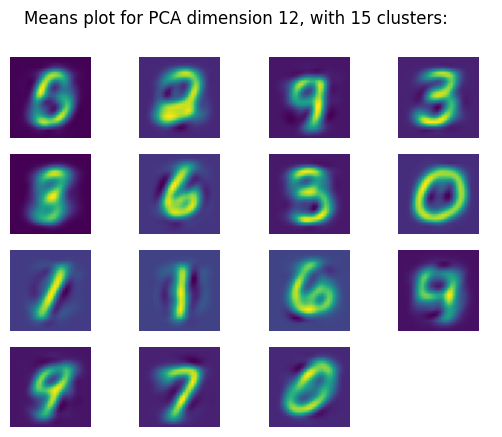

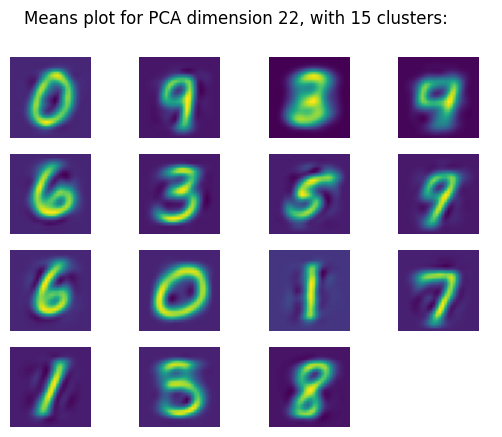

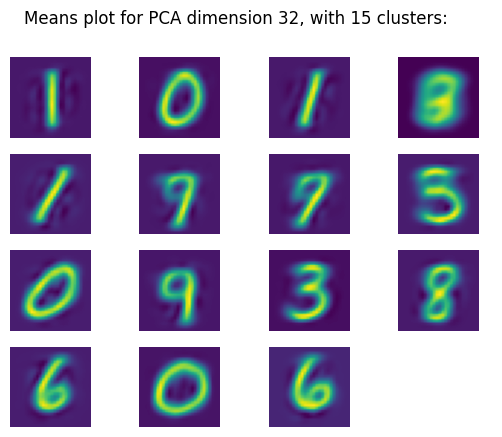

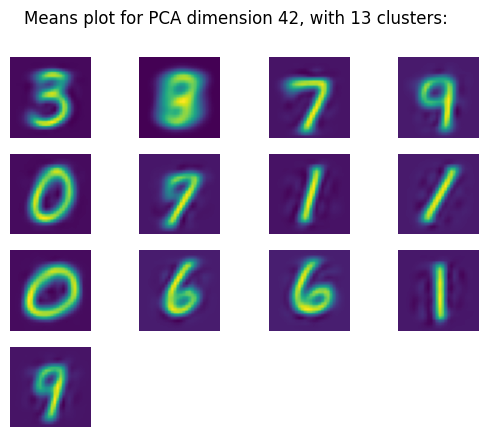

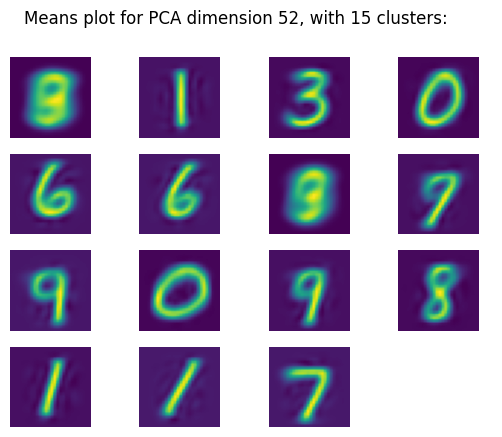

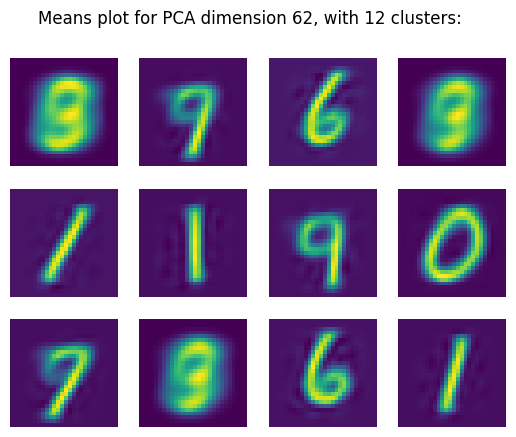

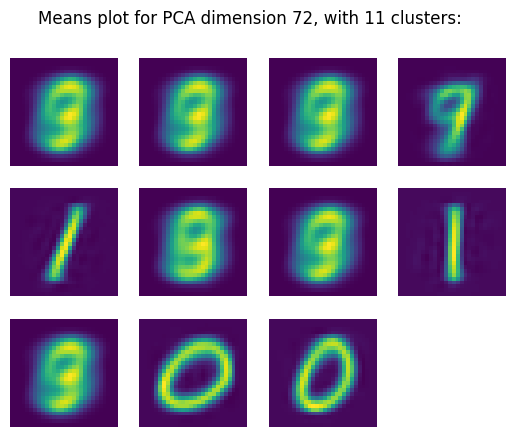

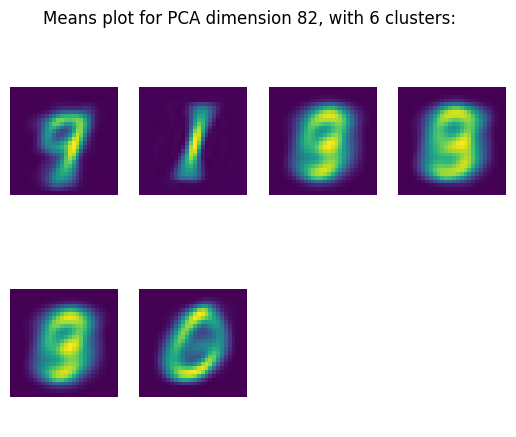

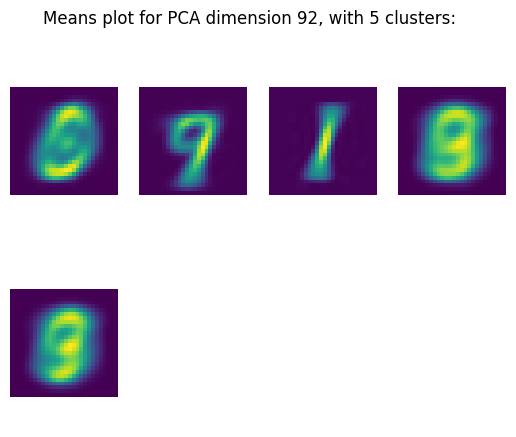

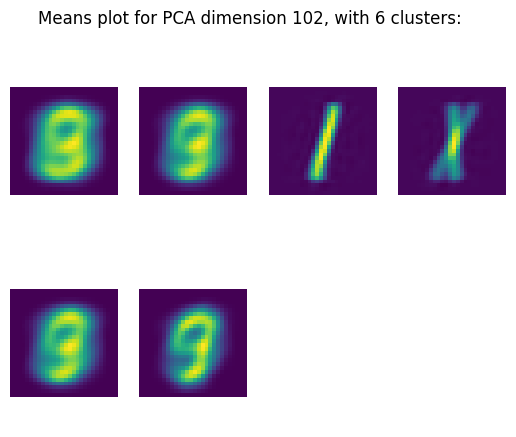

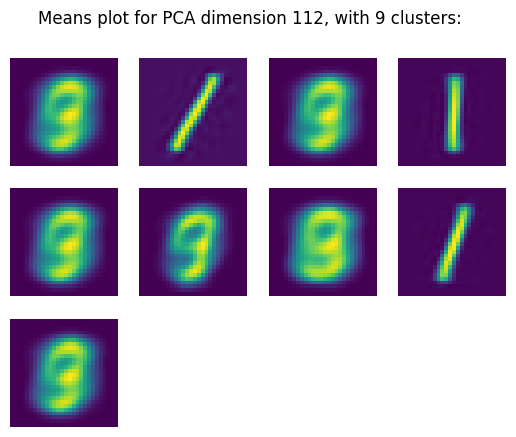

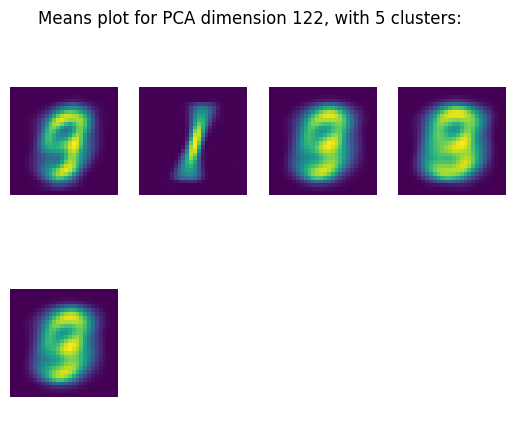

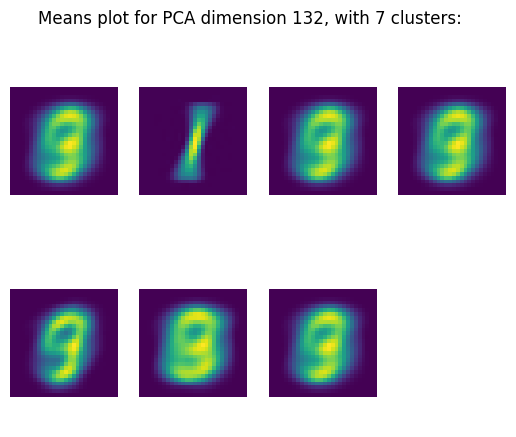

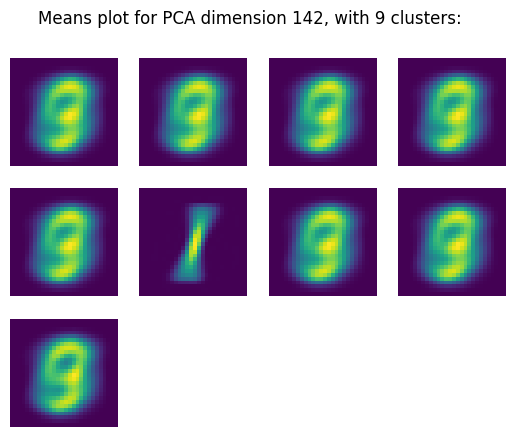

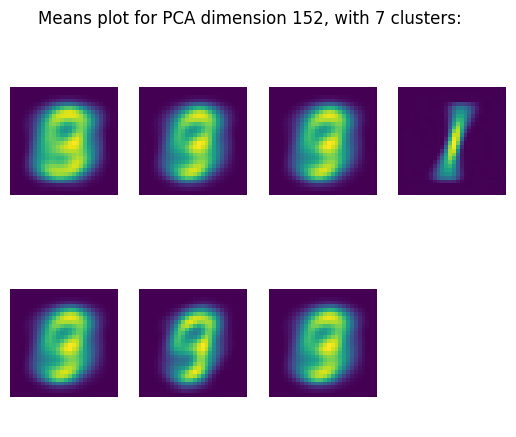

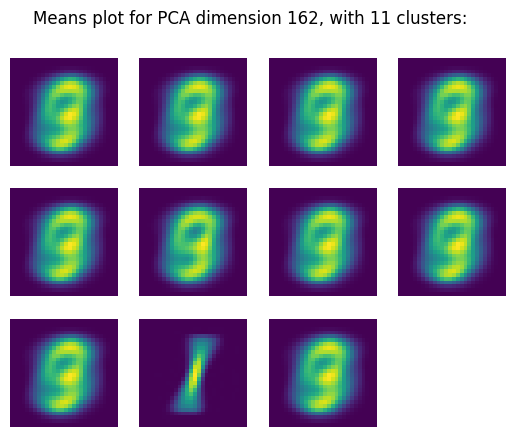

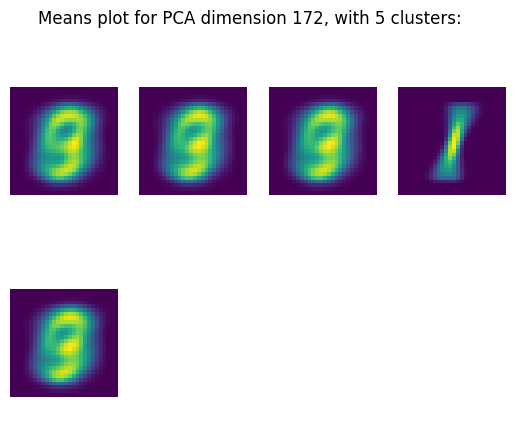

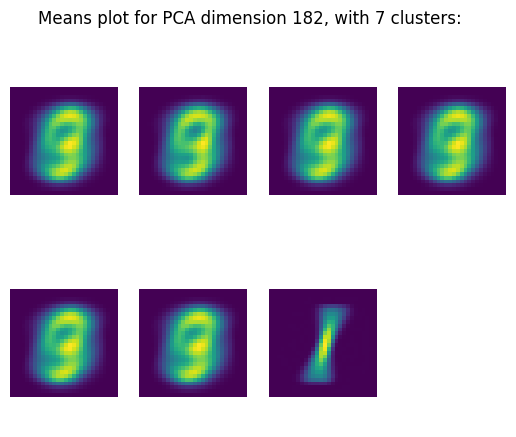

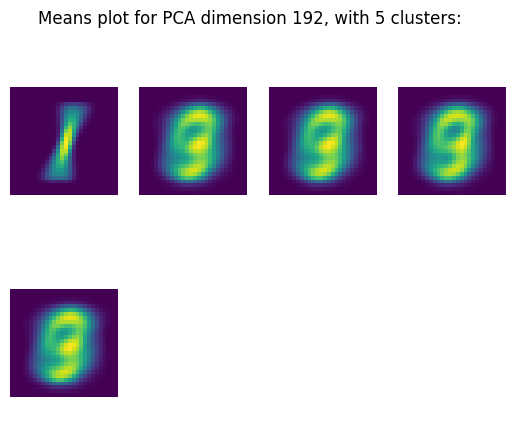

In [12]:
from math import ceil
import pickle

def plot_means(n_pc, means):
    
    with open("pca/pca_"+str(n_pc)+".pkl", 'rb') as inp:
        pca=pickle.load(inp)
        
    data=pca.inverse_transform(means)
    
    fig,axs=plt.subplots(ceil(len(means)/4),4)
    
    fig.suptitle(f"Means plot for PCA dimension {n_pc}, with {len(means)} clusters:")
    
    axs = [item for sublist in axs for item in sublist]
    
    for i in range(len(axs)):
        axs[i].axis('off')
        
    for i,mean in enumerate(data):
        axs[i].imshow(mean.reshape(28, 28))

for x in range(2,200,10):
    plot_means(x,fitted_estimators[x].means_)
    
#plot_means(2,fitted_estimators[2].means_)